## Semisupervised learning
Using clusters to get few representative instances and then using them as labels to train the model (supervised learning)

In this notebook, we will be using _load_digits_ dataset 

In [3]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X,y = load_digits(return_X_y=True)
X.shape

(1797, 64)

1797 images of 8x8 resolution

In [20]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [21]:
## Check with Logistic Regression without clustering
from sklearn.linear_model import LogisticRegression
n_labels = 50 #50 labelled images
log_reg = LogisticRegression(random_state=42)
log_reg.fit(x_train_scaled[:n_labels],y_train[:n_labels])

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [22]:
accuracy_score(y_test,log_reg.predict(x_test_scaled))

0.8018518518518518

In [23]:
#What would accuracy be if i use all labelled instances
log_reg_full = LogisticRegression(random_state=42)
log_reg_full.fit(x_train_scaled,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [24]:
accuracy_score(y_test,log_reg_full.predict(x_test_scaled))

0.9648148148148148

obviously its higher than when we used only 50 labelled instances

___What if we had no labelled instances?___  
- Choose number of appropriate cluster (here I thought that 100 might be good), (remember that you will have to label instances manually so pick clusters according to that)
- transform the original data into data of shape [n_samples,n_clusters], where each column is a cluster and its values is distance between instance and cluster
- Then for each cluster get an instance that is closest to it, that instance will be representative of its cluster
- Then pick those representative instances from original dataset
- plot the images, or get label of those representative instance somehow
- Now you have instances and labels!! train the supervised learning model!!

___Cant we just give labels to any random instances in the dataset and then train model?___  
We already tried that, see above, log_reg gave very less accuracy.   
So instead of labelling random instances we will label important instances

In [ ]:
## Applying kmeans for semisupervised learning
from sklearn.cluster import KMeans

k=100 #Taking 50 clusters                            #step 1
kmeans= KMeans(n_clusters=k,init="k-means++",n_init=8,random_state=42)

x_digits_dist = kmeans.fit_transform(x_train)        #step 2 Transform dataset
x_representatives_idx = x_digits_dist.argmin(axis=0) #step 3 get idx of instance closest to its respective cluster

x_representative_digits = x_train[x_representatives_idx] #step 4

In [37]:
def plot_img(X):
    plt.axis("off")
    plt.imshow(X.reshape(8,8),cmap='binary')

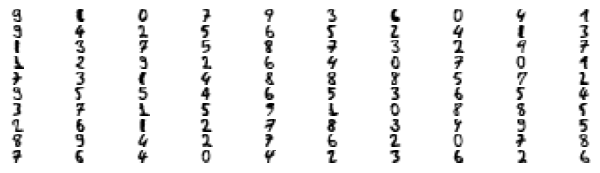

In [39]:
## Plot representative images 
plt.figure(figsize=(8,2))

for idx,img in enumerate(x_representative_digits):
    plt.subplot(10,10,1+idx)
    plot_img(img)

In [ ]:
y_train_labels=np.array([    #step 5
 9,1,0,7,9,3,6,0,4,1,
 9,4,2,5,6,5,2,4,1,3,
 1,3,7,5,8,7,3,2,9,7,
 1,2,9,2,6,4,0,7,0,1,
 7,3,1,4,8,8,8,5,7,2,
 9,5,5,4,6,5,3,6,5,4,
 3,7,1,5,9,1,0,8,8,5,
 2,6,1,2,7,8,3,4,9,5,
 8,9,4,2,7,6,2,0,7,8,
 7,6,4,0,4,2,3,6,2,6
])


In [44]:
log_reg_semisup = LogisticRegression()
log_reg_semisup.fit(x_representative_digits,y_train_labels)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [45]:
accuracy_score(y_test,log_reg_semisup.predict(x_test))

0.9166666666666666

We just trained a supervised model and predicted instances without even using lables!!  
And its accuracy is more than the model trained on random labelled instances (log_reg)